In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import compare
from tensorflow.keras.datasets import mnist
from visual_bars.generate_visual_bars_data import VisualBarsData
from cfl.util.data_processing import one_hot_encode
from cfl.experiment import Experiment

In [2]:
# paths
base_path = '/Users/imanwahle/Desktop/cfl/cfl/cluster_methods/compare_methods'
DATA_PATH = os.path.join(base_path, 'data')
RESULTS_PATH = os.path.join(base_path, 'results')

In [ ]:
# constants
n_samples = 5000
random_state = 42
data_names = ['blobs_const', 'blobs_vard', 'mnist', 'vb_noise0.0', 'vb_noise0.1']

# CDE params for vis_bars datasets
CNN_params = { # parameters for model creation
                    'filters'         : [32, 16],
                    'input_shape'     : (10, 10, 1),
                    'kernel_size'     : [(3, 3)] *2,
                    'pool_size'       : [(2, 2)] *2,
                    'padding'         : ['same'] *2,
                    'conv_activation' : ['softmax', 'softmax'],
                    'dense_units'     : 16,
                    'dense_activation' : 'softmax',
                    'output_activation': 'softmax',

                    # parameters for training
                    'batch_size'  : 32,
                    'n_epochs'    : 40,
                    'optimizer'   : 'adam',
                    'opt_config'  : {},
                    'verbose'     : 2,
                    'weights_path': None,
                    'loss'        : 'mean_squared_error',
                    'show_plot'   : True,
                    'standardize' : False,
                    'best'        : True,
                }

In [4]:
# helper functions

def save_data(dataset, data_name):
    os.mkdir(os.path.join(DATA_PATH, data_name))
    np.save(os.path.join(DATA_PATH, data_name, 'data_to_cluster.npy'), dataset[0])
    np.save(os.path.join(DATA_PATH, data_name, 'true_labels.npy'), dataset[1])

def visualize_data(dataset, data_name):
    # get embedding
    if dataset[0].shape[1] > 2:
        embedding = compare.get_embedding(DATA_PATH, data_name)
    else:
        embedding = dataset[0]
    
    # make subplot
    fig,ax = plt.subplots()
    compare.scatter_helper(ax, embedding, dataset[1], data_name, subscript=None)

    plt.show()

def get_vb_data(n_samples, noise_lvl, random_state):
    vb_data = VisualBarsData(n_samples=n_samples, noise_lvl=noise_lvl, set_random_seed=random_state)
    X = vb_data.getImages()
    pyx_gt = vb_data.getGroundTruth()
    Y = vb_data.getTarget()
    return X, pyx_gt, Y

In [7]:
# The following blocks are written as stand-alone processes to generate each dataset. 
# Only run the ones you want.

In [ ]:
# # uniform variance blobs

# data = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
# save_data(data, data_names[0])
# visualize_data(data, data_names[0])

In [ ]:
# # varied variance blobs

# data = datasets.make_blobs(n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5],  random_state=random_state)
# save_data(data, data_names[1])
# visualize_data(data, data_names[1])

In [ ]:
# # mnist digits

# (train_X, train_y), (test_X, test_y) = mnist.load_data()
# train_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1]*train_X.shape[2]))

# # we only want n_samples points from mnist for now
# np.random.seed(random_state)
# idx = np.random.choice(range(train_X.shape[0]), n_samples)
# data = [train_X[idx,:], train_y[idx,]]

# save_data(data, data_names[2])
# visualize_data(data, data_names[2])

All results from this run will be saved to /Users/imanwahle/Desktop/cfl/cfl/cluster_methods/compare_methods/tmp_cfl_results/experiment0006
name not specified in input, defaulting to CondExpCNN
Training CFL pipeline.
Train on 3750 samples, validate on 1250 samples
Epoch 1/40
3750/3750 - 7s - loss: 0.2488 - val_loss: 0.2476
Epoch 2/40
3750/3750 - 4s - loss: 0.2485 - val_loss: 0.2466
Epoch 3/40
3750/3750 - 3s - loss: 0.2411 - val_loss: 0.2271
Epoch 4/40
3750/3750 - 4s - loss: 0.2128 - val_loss: 0.1975
Epoch 5/40
3750/3750 - 4s - loss: 0.1880 - val_loss: 0.1787
Epoch 6/40
3750/3750 - 3s - loss: 0.1728 - val_loss: 0.1677
Epoch 7/40
3750/3750 - 3s - loss: 0.1636 - val_loss: 0.1632
Epoch 8/40
3750/3750 - 3s - loss: 0.1586 - val_loss: 0.1583
Epoch 9/40
3750/3750 - 3s - loss: 0.1563 - val_loss: 0.1568
Epoch 10/40
3750/3750 - 3s - loss: 0.1550 - val_loss: 0.1562
Epoch 11/40
3750/3750 - 3s - loss: 0.1544 - val_loss: 0.1558
Epoch 12/40
3750/3750 - 3s - loss: 0.1542 - val_loss: 0.1552
Epoch 13/40
3

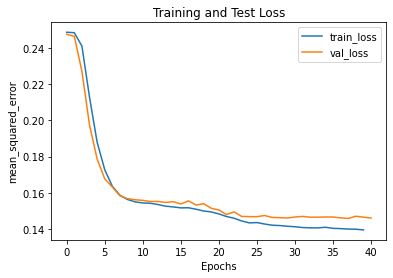

Loading parameters from  tmp_checkpoints/best_weights
Saving parameters to  /Users/imanwahle/Desktop/cfl/cfl/cluster_methods/compare_methods/tmp_cfl_results/experiment0006/trained_blocks/CondExpCNN


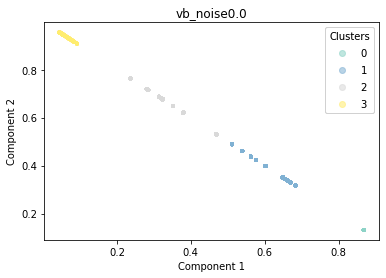

In [10]:
# # visual bars CDE output
# X, pyx_gt, Y = get_vb_data(n_samples, 0.0, random_state)

# # format data for CDE training
# X = np.expand_dims(X, -1)
# Y = one_hot_encode(Y, unique_labels=[0,1])

# data_info = {'X_dims': X.shape,
#              'Y_dims': Y.shape,
#              'Y_type': 'categorical'}

# block_names = ['CondExpCNN']
# block_params = [CNN_params]

# save_path = '/Users/imanwahle/Desktop/cfl/cfl/cluster_methods/compare_methods/tmp_cfl_results'
# my_exp = Experiment(X_train=X, Y_train=Y, data_info=data_info, 
#                     block_names=block_names, block_params=block_params, 
#                     blocks=None, results_path=save_path)

# results = my_exp.train()
# pyx = results['CondExpCNN']['pyx']

# # package data
# data = [pyx, pyx_gt]
# save_data(data, data_names[3])
# visualize_data(data, data_names[3])

All results from this run will be saved to /Users/imanwahle/Desktop/cfl/cfl/cluster_methods/compare_methods/tmp_cfl_results/experiment0007
Training CFL pipeline.
Train on 3750 samples, validate on 1250 samples
Epoch 1/40
3750/3750 - 5s - loss: 0.2491 - val_loss: 0.2476
Epoch 2/40
3750/3750 - 4s - loss: 0.2488 - val_loss: 0.2473
Epoch 3/40
3750/3750 - 3s - loss: 0.2485 - val_loss: 0.2458
Epoch 4/40
3750/3750 - 3s - loss: 0.2428 - val_loss: 0.2293
Epoch 5/40
3750/3750 - 4s - loss: 0.2146 - val_loss: 0.1910
Epoch 6/40
3750/3750 - 4s - loss: 0.1885 - val_loss: 0.1729
Epoch 7/40
3750/3750 - 3s - loss: 0.1769 - val_loss: 0.1640
Epoch 8/40
3750/3750 - 3s - loss: 0.1690 - val_loss: 0.1588
Epoch 9/40
3750/3750 - 4s - loss: 0.1640 - val_loss: 0.1576
Epoch 10/40
3750/3750 - 3s - loss: 0.1611 - val_loss: 0.1541
Epoch 11/40
3750/3750 - 4s - loss: 0.1590 - val_loss: 0.1536
Epoch 12/40
3750/3750 - 3s - loss: 0.1574 - val_loss: 0.1518
Epoch 13/40
3750/3750 - 4s - loss: 0.1561 - val_loss: 0.1513
Epoch 

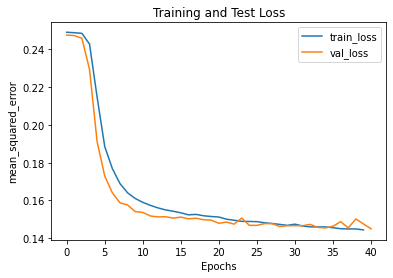

Loading parameters from  tmp_checkpoints/best_weights
Saving parameters to  /Users/imanwahle/Desktop/cfl/cfl/cluster_methods/compare_methods/tmp_cfl_results/experiment0007/trained_blocks/CondExpCNN


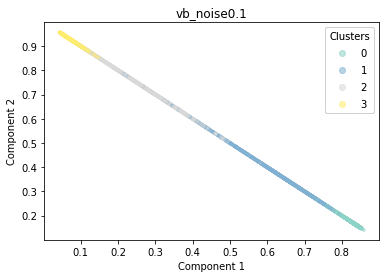

In [11]:
# # visual bars CDE output
# X, pyx_gt, Y = get_vb_data(n_samples, 0.1, random_state)

# # format data for CDE training
# X = np.expand_dims(X, -1)
# Y = one_hot_encode(Y, unique_labels=[0,1])

# data_info = {'X_dims': X.shape,
#              'Y_dims': Y.shape,
#              'Y_type': 'categorical'}

# block_names = ['CondExpCNN']
# block_params = [CNN_params]

# save_path = '/Users/imanwahle/Desktop/cfl/cfl/cluster_methods/compare_methods/tmp_cfl_results'
# my_exp = Experiment(X_train=X, Y_train=Y, data_info=data_info, 
#                     block_names=block_names, block_params=block_params, 
#                     blocks=None, results_path=save_path)

# results = my_exp.train()
# pyx = results['CondExpCNN']['pyx']

# # package data
# data = [pyx, pyx_gt]
# save_data(data, data_names[4])
# visualize_data(data, data_names[4])